1) Write simple (straightforward) definitions for the following parameters for RandomForestClassifier (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClass ifier.html) and indicate how they correlate with the precision and recall for the basic diabetes model we built in class. You will need to rerun the model multiple times to do so.

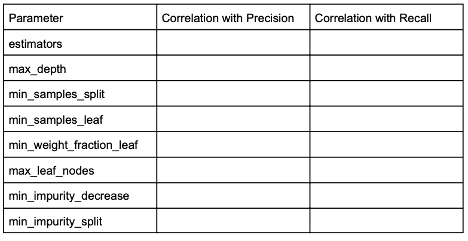

leaf nodes: terminating node

internal nodes: connection beyond them

In [262]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

diabetes_df = pd.read_csv("diabetes copy2.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [263]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### 1) Estimator: 
        The number of decision trees

70 --> 68,59

100 --> 68, 54

200 --> 70,58

300 --> 68,56

500 --> 71,58

For 1s (Diabetic):

I started off by setting the parameter to 70 which gave 68% precision and 59% recall. Then I increased it to 100 which did not make any difference to the precision but recall went down to 54%. Increasing it to 200 improved both precision and recall. But increasing it to 300 caused the precision and recall to go down. 500 seemed like the ideal number of trees as it results in the model being 71% correct in predicting the diabetic cases and was able to catch 58% of all diabetic cases--  the highest precision and recall together.

There does not seem to be a consistent correlation between the decision trees and the precision/recall.

In [260]:
from sklearn.ensemble import RandomForestClassifier
#estimator = model
rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

In [261]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



### 2) Maximum Depth
    
    The amount of levels each tree can have (this is the limit)

None--> 68,54 (Same for depth = 20)

2 --> 75,37

5 --> 69,49: MAX DEPTH INCREASE, PRECISION DECREASE  | MAX DEPTH INCREASE, RECALL INCREASE

8 --> 69,56: MAX DEPTH INCREASE, PRECISION DECREASE  | MAX DEPTH INCREASE, RECALL INCREASE

10 --> 69,58: MAX DEPTH INCREASE, PRECISION SAME     | MAX DEPTH INCREASE, RECALL INCREASE

45 --> 69,54: MAX DEPTH INCREASE, PRECISION SAME     | MAX DEPTH INCREASE, RECALL DECREASE

Overall, as the max depth increased, the precision and recall pairs got better. Unlike with estimator, there seems to be more of a correlation here--sort of like a bell-curve. As the depth increased the recall score got better (positive correlation) but too much of an increase (45) made the recall score go down. On the other hand, the precision score did not change as the paramter increased. 

In [90]:
rf = RandomForestClassifier(max_depth = 45  ,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

In [91]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



### 3) Minimum Samples Split

    The min number of samples required to split a internal node(each part of the tree excluding the terminating nodes)
    

2 (default) --> 68, 54

15 --> 67, 56: 

5 -->  68, 57: MIN SAMPLE SPLIT DECREASE, PRECISION INCREASE  | MIN SAMPLE SPLIT DECREASE, RECALL INCREASE

10 --> 68, 54: MIN SAMPLE SPLIT INCREASE, PRECISION SAME      | MIN SAMPLE SPLIT INCREASE, RECALL DECREASE

3 --> 70, 56:  MIN SAMPLE SPLIT DECREASE, PRECISION INCREASE  | MIN SAMPLE SPLIT DECREASE, RECALL INCREASE?


Both precision and recall's relationship with minimum samples split resembles normal distribution. The scores are the most ideal at 3 splits with precision being 70% and recall being 56 %. Going lower than 3 dropped both scores and going higher caused an overall decrease as well. 

In [256]:
rf = RandomForestClassifier(min_samples_split = 2 ,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

In [257]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



### 4) Minimum Samples Leaf

 
       The min number of samples required at a leaf node (last part of the tree)
  

15 --> 68,49: 

5 -->  70,54: MIN SAMPLE LEAF DECREASE, PRECISION INCREASE | MIN SAMPLE LEAF DECREASE, RECALL INCREASE

10 --> 68,53: MIN SAMPLE LEAF INCREASE, PRECISION DECREASE | MIN SAMPLE LEAF INCREASE, RECALL DECREASE

3 --> 69,54:  MIN SAMPLE LEAF DECREASE, PRECISION INCREASE | MIN SAMPLE LEAFT DECREASE, RECALL INCREASE

18 --> 67,47:  MIN SAMPLE LEAF INCREASE, PRECISION DECREASE| MIN SAMPLE LEAFT INCREASE, RECALL DECREASE

Both precision and recall have an overall negative correlation with  minimum samples leaf. The ideal samples here was 5. 

In [124]:
rf = RandomForestClassifier(min_samples_leaf = 18,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7316017316017316

In [125]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       150
           1       0.67      0.47      0.55        81

    accuracy                           0.73       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



### 5) Minimum Weight Fraction Leaf

    - min_weight_fraction_leaf: the fraction of the samples needed at a leaf node where weights are determined by sample_weight, this is a way to deal with class imbalance.

15 --> 69/49: 

5 -->  72/44: MIN WEIGHT FRACTION LEAF DECREASE, PRECISION INCREASE | 
       
          MIN WEIGHT FRACTION LEAF DECREASE, RECALL DECREASE

10 --> 67/49: MIN WEIGHT FRACTION LEAF INCREASE, PRECISION DECREASE | 

          MIN WEIGHT FRACTION LEAF INCREASE, RECALL INCREASE

3 --> 75/37:  MIN WEIGHT FRACTION LEAF DECREASE, PRECISION INCREASE | 
        
          MIN WEIGHT FRACTION LEAF DECREASE, RECALL DECREASE

18 --> 69/52:  MIN WEIGHT FRACTION LEAF INCREASE, PRECISION DECREASE| 

          MIN WEIGHT FRACTION LEAF INCREASE, RECALL INCREASE

As the the minimum weight fraction leaf increased, the precision loosely resembles a normal distribution. At 3 the precision score is high but goes down slightly with the increase of the weight fraction leaf only to go back up again when the value is 15. 

The recall score has a positive correlation to this parameter--both increase. 

In [139]:
rf = RandomForestClassifier(max_leaf_nodes = 18,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

In [140]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.69      0.52      0.59        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



### 6)  Maximum Leaf Nodes


    - max_leaf_nodes: the max amount of nodes a tree can have. (If None then unlimited number of leaf nodes.)
        at each level or overall?

None --> 68/54

15 --> 69/49: 

5 -->  72/44: MAX LEAF NODES DECREASE, PRECISION INCREASE | 
       
          MAX LEAF NODES DECREASE, RECALL DECREASE

10 --> 67/49: MAX LEAF NODES INCREASE, PRECISION DECREASE | 

          MAX LEAF NODES INCREASE, RECALL INCREASE

3 --> 75/37:  MAX LEAF NODES DECREASE, PRECISION INCREASE | 
        
          MAX LEAF NODES DECREASE, RECALL DECREASE

18 --> 69/52:  MAX LEAF NODES INCREASE, PRECISION DECREASE| 

          MAX LEAF NODES INCREASE, RECALL INCREASE

Lower Maximum Leaf Nodes: High precision, low recall

High Maximum Leaf Nodes: Low precision, higher recall

Recall: postive correlation

Precision: negative correlation

In [163]:
#estimator = model  
rf = RandomForestClassifier(max_leaf_nodes = None ,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

In [164]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



### 7) Minimum Impurity Decrease

    - min_impurity_decrease: A node will be split if this split causes a decrease of the impurity greater than or equal to this value.
    
    -Larger values create a large threshold for splitting the node
    
    - This parameter stops a split if the amount of decrease from the split is < the entered amount.
    
    - IMPURITY MEASURE: how well a certain amount of classes are separated. 

- precision - negative correlation
- recall - negative correlation


- Larger the values create larger the thresholds which decrease both precision and recall score

0 --> 68/54


0.00011 -->  65/56: MIN IMPURITY DE. INCREASE, PRECISION DECREASE | 
       
          MIN IMPURITY DE. DECREASE, RECALL INCREASE

0.00021 --> 66/56: MIN IMPURITY DE. INCREASE, PRECISION INCREASE | 

         MIN IMPURITY DE. INCREASE, RECALL SAME

0.00091 --> 70/56:  MIN IMPURITY DE. INCREASE, PRECISION INCREASE | 
        
          MIN IMPURITY DE. INCREASE, RECALL SAME

0.00191 --> SAME AS PREVIOUS OBSERVATION!

0.00591 --> 68/48:  MIN IMPURITY DE. INCREASE, PRECISION DECREASE | 
        
          MIN IMPURITY DE. INCREASE, RECALL DECREASE

0.0091 (increase) --> 70/47

0.001 (increase --> 67/47

0.00001 (decrease) --> 68/54

0.009 (increase) --> 71/48



In [227]:
#estimator = model  
rf = RandomForestClassifier(min_impurity_decrease = 0.009, random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

In [228]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.71      0.48      0.57        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.75      0.73       231



2) How does setting bootstrap=False influence the model performance? Note: the default is bootstrap=True. Explain why your results might be so.

In [265]:
#estimator = model  
rf = RandomForestClassifier(bootstrap = False, random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7575757575757576

In [266]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.58      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231



In [267]:
#estimator = model  
rf = RandomForestClassifier(bootstrap = True, random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7489177489177489

In [268]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



### When bootstrap is false: 
    the model is being trained the entire dataset for each tree.
    
### When bootstrap is true:
    The model is trained on samples from the training set to build each tree--samples are drawn with replacemnt


When bootstrap is false, the precision and recall scores are higher. This may be because the model is being trained on the WHOLE dataset so prediction on the test set is higher since it is part of the training set too which leads to overfitting. 